# Proyecto web scraper ZARA-NIKE-CRUZ AZUL

In [48]:
# Librerías a utilizar:
import pandas as pd
import pandasql as ps
#from urllib.request import urlopen
#import urllib.request
#import requests
import time 
import numpy as np
import re
from selenium import webdriver
import matplotlib.pyplot as plt
#from selenium.webdriver.common.keys import Keys

## Requeremientos

In [49]:
## instalacion de web driver 
## instalacion de selenium y pandas sql

### Definiciones

In [50]:
# tag html: Una etiqueta HTML es una pieza de lenguaje de marcado que se utiliza para indicar el principio y el final 
#           de un elemento HTML en un documento HTML. Como parte de un elemento HTML, las etiquetas HTML ayudan 
#           a los navegadores web a convertir documentos HTML en páginas web.


# class html: La clase es un atributo que especifica uno o más nombres de clase para un elemento HTML. El atributo de clase 
#             se puede utilizar en cualquier elemento HTML. CSS y JavaScript pueden usar el nombre de clase para realizar 
#             ciertas tareas para elementos con el nombre de clase especificado

# ZARA

In [51]:
aux=pd.DataFrame()
aux.to_excel("df_zara.xlsx",index=False)

In [52]:
def Buscador_Precios_Selenium_zara(producto):
    """
    Función que hace WEB SCRAPPING EN LA PÁGINA DE ZARA
    """
    ### ingresamos a la pagina web 
    path = r"C:\webdriver\chromedriver.exe"
    #path = mipath
    driver=webdriver.Chrome(path)
    url = "https://www.zara.com/mx/es/search?searchTerm="+producto+"&section=WOMAN"
    driver.get(url)
    
    ####### Accedemos a los elementos que contienen los datos que queremos de la pagina web 
    

    productos= driver.find_elements_by_class_name("product-grid-product__info-wrapper")
    
    ### accedemos a las urls almacenadas en la variable productos

    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
            
    ### accedemos a los nombres de los productos

    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[0].text)
        except:
            lista_nombres.append(np.nan)
            
            
    ### accedemos a los precios base y promo de los productos 

    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("price-current__amount")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("price-old__amount")[0].text)
        except:
            lista_promos.append(np.nan)





    df_zara =pd.DataFrame({"nombre":lista_nombres,"url":lista_urls,"precio1":lista_promos,"precio2":lista_precios})
    df_zara["Tienda"]="ZARA"
    df_zara["marca"]= producto
    df_zara["fecha"]= time.strftime("%d/%m/%y")

    df_zara = df_zara[["fecha","Tienda","marca","nombre","url","precio1","precio2"]]
    ## este filtro apenas se agrega

    #df_zara = df_zara[df_zara['nombre'].astype(str).str.contains(r'\b{}\b'.format(producto), regex=True, case=False)]
    df_zara  = df_zara.reset_index(drop=True)



    datos_webscraper=pd.read_excel("df_zara.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_zara],axis=0)

    datos_webscraper.to_excel("df_zara.xlsx",index=False)

    driver.quit()
    return df_zara

In [53]:
# Se aplica la función anterior a los siguientes productos:
for productos in ["chamarra","playera","gorra"]:
    Buscador_Precios_Selenium_zara(productos)

<ipython-input-52-196f54230626>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
<ipython-input-52-196f54230626>:15: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("product-grid-product__info-wrapper")
C:\Users\hp\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\hp\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
C:\Users\hp\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.

In [54]:
df_zara=pd.read_excel("df_zara.xlsx")
df_zara.head()

,fecha,Tienda,marca,nombre,url,precio1,precio2
0,27/01/22,ZARA,playera,VETIVER PAMPLEMOUSSE 75G,https://www.zara.com/mx/es/vetiver-pamplemouss...,NaN,"299,00 MXN"
1,27/01/22,ZARA,playera,VETIVER PAMPLEMOUSSE FRAGRANCED RINSE-FREE HAN...,https://www.zara.com/mx/es/vetiver-pamplemouss...,NaN,"299,00 MXN"
2,27/01/22,ZARA,playera,VETIVER PAMPLEMOUSSE GEL DE MANOS SIN ACLARADO...,https://www.zara.com/mx/es/vetiver-pamplemouss...,NaN,"179,00 MXN"
3,27/01/22,ZARA,playera,VETIVER PAMPLEMOUSSE 200G,https://www.zara.com/mx/es/vetiver-pamplemouss...,NaN,"499,00 MXN"
4,27/01/22,ZARA,playera,MINI SHOPPER CROCHET,https://www.zara.com/mx/es/mini-shopper-croche...,NaN,"999,00 MXN"


In [55]:
# Limpiando precios
for precio in ['precio1','precio2']:
    df_zara[precio] = df_zara[precio].str.replace(" MXN","")
    df_zara[precio] = df_zara[precio].str.replace(".","")
    df_zara[precio] = df_zara[precio].str.replace(",",".")
    df_zara[precio] = df_zara[precio].astype(float)

<ipython-input-55-13f9f80ddf97>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_zara[precio] = df_zara[precio].str.replace(".","")


In [56]:
ps.sqldf("select  * from df_zara where (marca = 'chamarra') limit 5")

,fecha,Tienda,marca,nombre,url,precio1,precio2


In [57]:
ps.sqldf("select marca, url from df_zara where (marca = 'gorra') limit 10 ")

,marca,url
0,gorra,https://www.zara.com/mx/es/gorra-tipo-marinero...
1,gorra,https://www.zara.com/mx/es/beanie-punto-p03739...
2,gorra,https://www.zara.com/mx/es/beanie-punto-p03739...
3,gorra,https://www.zara.com/mx/es/boina-lana-p0373921...
4,gorra,https://www.zara.com/mx/es/beanie-punto-p03739...
5,gorra,https://www.zara.com/mx/es/boina-lana-p0373921...
6,gorra,https://www.zara.com/mx/es/beanie-punto-p03739...
7,gorra,https://www.zara.com/mx/es/beanie-punto-p00653...
8,gorra,https://www.zara.com/mx/es/beanie-punto-p03739...
9,gorra,https://www.zara.com/mx/es/sombrero-fieltro-p0...


In [58]:
ps.sqldf("select count(*) from df_zara where (marca = 'gorra') ")

,count(*)
0,21


In [59]:
ps.sqldf("select count(*) from df_zara where precio1 is null")

,count(*)
0,24


In [60]:
ps.sqldf("select count(*) from df_zara where (marca= 'playera') ")

,count(*)
0,8


In [61]:
ps.sqldf("select marca,avg(precio2) as preciopromedio from df_zara group by marca ")

,marca,preciopromedio
0,gorra,391.857143
1,playera,444.000000


In [62]:
ps.sqldf("select count(*)  from df_zara where precio1 is not null ")

,count(*)
0,5


In [63]:
ps.sqldf("select *  from df_zara where precio1 <10000 or precio2<10000 limit 5")

,fecha,Tienda,marca,nombre,url,precio1,precio2
0,27/01/22,ZARA,playera,VETIVER PAMPLEMOUSSE 75G,https://www.zara.com/mx/es/vetiver-pamplemouss...,None,299.0
1,27/01/22,ZARA,playera,VETIVER PAMPLEMOUSSE FRAGRANCED RINSE-FREE HAN...,https://www.zara.com/mx/es/vetiver-pamplemouss...,None,299.0
2,27/01/22,ZARA,playera,VETIVER PAMPLEMOUSSE GEL DE MANOS SIN ACLARADO...,https://www.zara.com/mx/es/vetiver-pamplemouss...,None,179.0
3,27/01/22,ZARA,playera,VETIVER PAMPLEMOUSSE 200G,https://www.zara.com/mx/es/vetiver-pamplemouss...,None,499.0
4,27/01/22,ZARA,playera,MINI SHOPPER CROCHET,https://www.zara.com/mx/es/mini-shopper-croche...,None,999.0


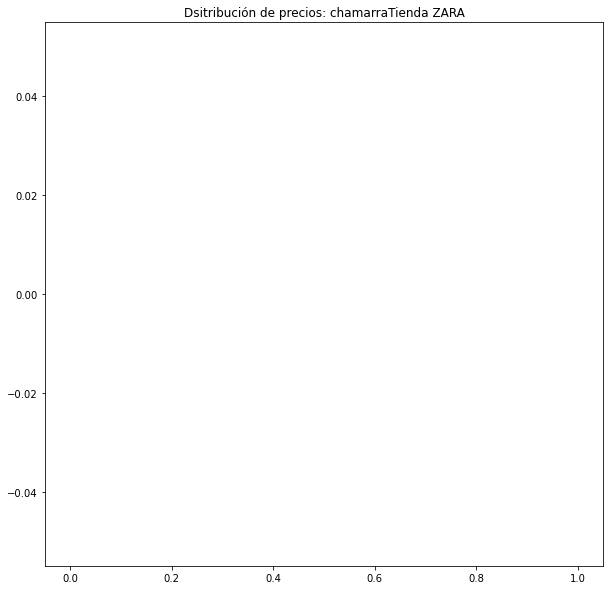

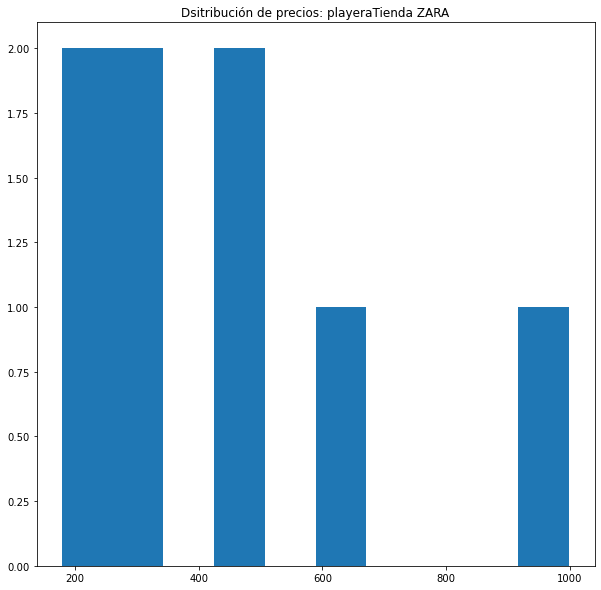

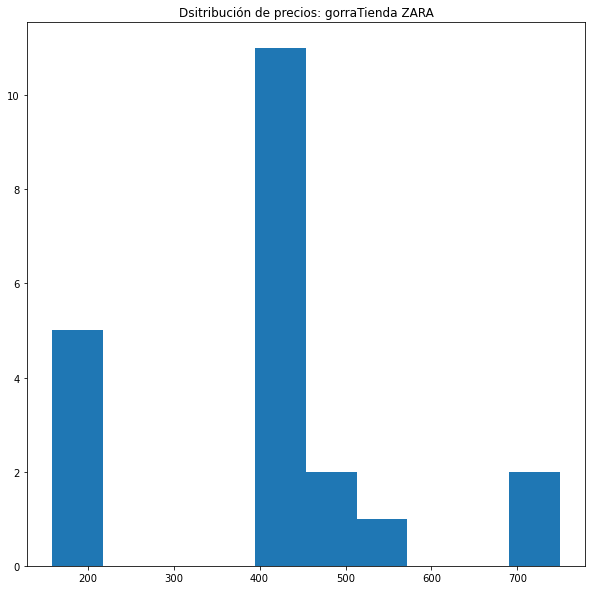

In [64]:
# Ditribución de precios

for i in ["chamarra","playera","gorra"]:
    plt.figure(figsize=(10,10))
    plt.hist(df_zara[df_zara['marca']==i]["precio2"])
    plt.title("Dsitribución de precios: " +str(i)+"Tienda ZARA")
    plt.show()

# NIKE

In [65]:
aux=pd.DataFrame()
aux.to_excel("df_nike.xlsx",index=False)

In [66]:
def Buscador_Precios_Selenium_nike(producto):
    """
    Función que hace WEB SCRAPPING EN LA PÁGINA DE NIKE
    """
  ### ingresamos a la pagina web 
    path = r"C:\webdriver\chromedriver.exe"
    #path= mipath
    driver=webdriver.Chrome(path)
    url= "https://www.nike.com/mx/w?q="+producto+"&vst="+producto
    driver.get(url)
    
    
    ####### Accedemos a los elementos que contienen los datos que queremos de la pagina web 
    

    productos= driver.find_elements_by_class_name("product-card__body")
    
    ### accedemos a las urls almacenadas en la variable productos

    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
            
    ### accedemos a los nombres de los productos

    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_class_name("product-card__subtitle")[0].text)
        except:
            lista_nombres.append(np.nan)
            
            
    ### accedemos a los precios base y promo de los productos 

    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("product-price")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("product-price")[1].text)
        except:
            lista_promos.append(np.nan)





    df_nike =pd.DataFrame({"nombre":lista_nombres,"url":lista_urls,"precio1":lista_promos,"precio2":lista_precios})
    df_nike["Tienda"]="Nike"
    df_nike["marca"]= producto
    df_nike["fecha"]= time.strftime("%d/%m/%y")

    df_nike = df_nike[["fecha","Tienda","marca","nombre","url","precio1","precio2"]]
    ## este filtro apenas se agrega

    #df_soriana = df_soriana[df_soriana['nombre'].astype(str).str.contains(r'\b{}\b'.format(producto), regex=True, case=False)]
    df_nike  = df_nike.reset_index(drop=True)



    datos_webscraper=pd.read_excel("df_nike.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_nike],axis=0)

    datos_webscraper.to_excel("df_nike.xlsx",index=False)

    driver.quit()
    return df_nike

In [67]:
# Se aplica la función anterior a los siguientes productos:
for productos in ["playera","gorra","chamarra"]:
    Buscador_Precios_Selenium_nike(productos)

<ipython-input-66-3a79bf1b5b07>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
<ipython-input-66-3a79bf1b5b07>:16: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("product-card__body")
C:\Users\hp\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\hp\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:464: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")


In [68]:
df_nike=pd.read_excel("df_nike.xlsx")
df_nike

,fecha,Tienda,marca,nombre,url,precio1,precio2
0,27/01/22,Nike,playera,Sudadera con gorro sin cierre de tejido Fleece...,https://www.nike.com/mx/t/sudadera-con-gorro-s...,NaN,"$1,549"
1,27/01/22,Nike,playera,Camiseta de tirantes de entrenamiento para hombre,https://www.nike.com/mx/t/camiseta-de-tirantes...,NaN,$699
2,27/01/22,Nike,playera,Sudadera de básquetbol con gorro para hombre,https://www.nike.com/mx/t/sudadera-de-b%C3%A1s...,NaN,"$2,149"
3,27/01/22,Nike,playera,Sudadera de entrenamiento para mujer,https://www.nike.com/mx/t/sudadera-de-entrenam...,NaN,"$1,249"
4,27/01/22,Nike,playera,Playera de running de cuello redondo para mujer,https://www.nike.com/mx/t/camiseta-de-cuello-r...,NaN,"$1,049"
...,...,...,...,...,...,...,...
65,27/01/22,Nike,chamarra,Chamarra de tejido Woven para mujer,https://www.nike.com/mx/t/chamarra-de-entrenam...,NaN,"$1,999"
66,27/01/22,Nike,chamarra,Chamarra de running para hombre,https://www.nike.com/mx/t/chamarra-de-running-...,NaN,"$1,699"
67,27/01/22,Nike,chamarra,Parka para hombre,https://www.nike.com/mx/t/parka-sportswear-the...,NaN,"$2,749"
68,27/01/22,Nike,chamarra,Chamarra universitaria Nike para hombre,https://www.nike.com/mx/t/chamarra-universitar...,NaN,"$2,749"


In [69]:
# Limpiando precios
for precio in ['precio1','precio2']:
    df_nike[precio] = df_nike[precio].str.replace("$","")
    df_nike[precio] = df_nike[precio].str.replace(",",".")
    df_nike[precio] = df_nike[precio].astype(float)

<ipython-input-69-fbabdced1569>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_nike[precio] = df_nike[precio].str.replace("$","")


In [70]:
ps.sqldf("select  * from df_nike where (marca = 'chamarra') limit 5")

,fecha,Tienda,marca,nombre,url,precio1,precio2
0,27/01/22,Nike,chamarra,Chamarra de running para mujer,https://www.nike.com/mx/t/chamarra-de-running-...,None,5.499
1,27/01/22,Nike,chamarra,Chamarra para hombre,https://www.nike.com/mx/t/chamarra-jordan-jump...,None,1.899
2,27/01/22,Nike,chamarra,Chamarra de calentamiento para hombre,https://www.nike.com/mx/t/chamarra-de-calentam...,None,2.299
3,27/01/22,Nike,chamarra,Camiseta para mujer,https://www.nike.com/mx/t/chamarra-jordan-new-...,None,2.749
4,27/01/22,Nike,chamarra,Chamarra de cierre completo de tejido Fleece p...,https://www.nike.com/mx/t/chamarra-de-cierre-c...,None,2.749


In [71]:
ps.sqldf("select count(*) from df_nike where (marca= 'playera') ")

,count(*)
0,24


In [72]:
ps.sqldf("select marca, url from df_nike where (marca = 'gorra') limit 10 ")

,marca,url
0,gorra,https://www.nike.com/mx/t/gorro-sportswear-her...
1,gorra,https://www.nike.com/mx/t/gorra-de-golf-dri-fi...
2,gorra,https://www.nike.com/mx/t/gorra-con-cierre-a-p...
3,gorra,https://www.nike.com/mx/t/gorra-de-running-per...
4,gorra,https://www.nike.com/mx/t/gorra-fc-barcelona-h...
5,gorra,https://www.nike.com/mx/t/gorra-de-running-aer...
6,gorra,https://www.nike.com/mx/t/gorro-ajustable-pro-...
7,gorra,https://www.nike.com/mx/t/gorra-giannis-herita...
8,gorra,https://www.nike.com/mx/t/gorra-prelavada-jord...
9,gorra,https://www.nike.com/mx/t/gorro-de-tenis-court...


In [73]:
ps.sqldf("select count(*) from df_nike where (marca = 'gorra') ")

,count(*)
0,22


In [74]:
ps.sqldf("select count(*) from df_nike where precio1 is null")

,count(*)
0,66


In [75]:
ps.sqldf("select marca,avg(precio2) as preciopromedio from df_nike group by marca ")

,marca,preciopromedio
0,chamarra,2.621500
1,gorra,507.409091
2,playera,418.882875


In [76]:
ps.sqldf("select count(*)  from df_nike where precio1 is not null ")

,count(*)
0,4


In [77]:
ps.sqldf("select *  from df_nike where precio1 <10000 or precio2<10000 limit 5")

,fecha,Tienda,marca,nombre,url,precio1,precio2
0,27/01/22,Nike,playera,Sudadera con gorro sin cierre de tejido Fleece...,https://www.nike.com/mx/t/sudadera-con-gorro-s...,None,1.549
1,27/01/22,Nike,playera,Camiseta de tirantes de entrenamiento para hombre,https://www.nike.com/mx/t/camiseta-de-tirantes...,None,699.000
2,27/01/22,Nike,playera,Sudadera de básquetbol con gorro para hombre,https://www.nike.com/mx/t/sudadera-de-b%C3%A1s...,None,2.149
3,27/01/22,Nike,playera,Sudadera de entrenamiento para mujer,https://www.nike.com/mx/t/sudadera-de-entrenam...,None,1.249
4,27/01/22,Nike,playera,Playera de running de cuello redondo para mujer,https://www.nike.com/mx/t/camiseta-de-cuello-r...,None,1.049


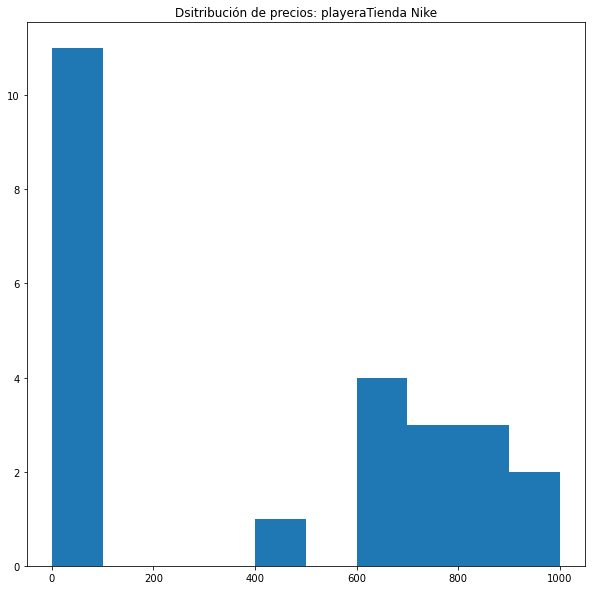

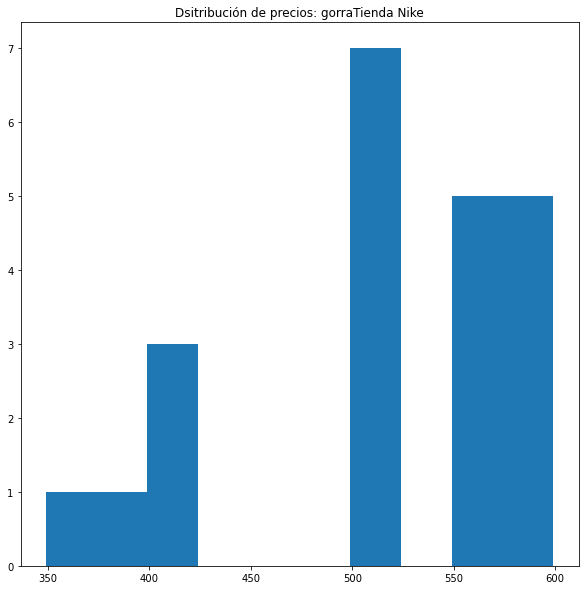

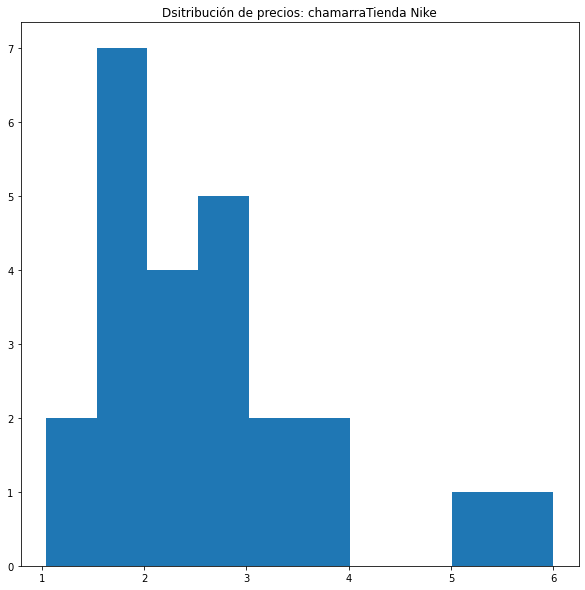

In [78]:
# Ditribución de precios

for i in ["playera","gorra","chamarra"]:
    plt.figure(figsize=(10,10))
    plt.hist(df_nike[df_nike['marca']==i]["precio2"])
    plt.title("Dsitribución de precios: " +str(i)+"Tienda Nike")
    plt.show()

# CRUZ AZUL

In [79]:
aux=pd.DataFrame()
aux.to_excel("df_cruz_azul.xlsx",index=False)

In [80]:
def Buscador_Precios_Selenium_cruz_azul(producto):
    """
    Función que hace WEB SCRAPPING EN LA PÁGINA DE CRUZ AZUL
    """
    ### ingresamos a la pagina web 
    path =r"C:\webdriver\chromedriver.exe"
    driver=webdriver.Chrome(path)
    url = "https://www.tiendacruzazul.mx/catalogsearch/result/?q="+producto
    driver.get(url)
    
    ####### Accedemos a los elementos que contienen los datos que queremos de la pagina web 
    

    productos= driver.find_elements_by_class_name("product-item-info")
    
    ### accedemos a las urls almacenadas en la variable productos

    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
            
    ### accedemos a los nombres de los productos

    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[1].text)
        except:
            lista_nombres.append(np.nan)
            
            
    ### accedemos a los precios base y promo de los productos 

    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("price")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("price")[1].text)
        except:
            lista_promos.append(np.nan)





    df_cruz_azul =pd.DataFrame({"nombre":lista_nombres,"url":lista_urls,"precio1":lista_promos,"precio2":lista_precios})
    df_cruz_azul["Tienda"]="Cruz Azul"
    df_cruz_azul["marca"]= producto
    df_cruz_azul["fecha"]= time.strftime("%d/%m/%y")

    df_cruz_azul = df_cruz_azul[["fecha","Tienda","marca","nombre","url","precio1","precio2"]]
    ## este filtro apenas se agrega

    #df_soriana = df_soriana[df_soriana['nombre'].astype(str).str.contains(r'\b{}\b'.format(producto), regex=True, case=False)]
    df_cruz_azul = df_cruz_azul.reset_index(drop=True)



    datos_webscraper=pd.read_excel("df_cruz_azul.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_cruz_azul],axis=0)

    datos_webscraper.to_excel("df_cruz_azul.xlsx",index=False)

    driver.quit()
    return df_cruz_azul

In [81]:
# Se aplica la función anterior a los siguientes productos:
for productos in ["gorra","playera","chamarra"]:
    Buscador_Precios_Selenium_cruz_azul(productos)

<ipython-input-80-7b9c59bc846d>:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
<ipython-input-80-7b9c59bc846d>:14: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("product-item-info")
C:\Users\hp\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\hp\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
C:\Users\hp\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:464: UserWarni

In [82]:
df_cruz_azul=pd.read_excel("df_cruz_azul.xlsx")
df_cruz_azul

,fecha,Tienda,marca,nombre,url,precio1,precio2
0,27/01/22,Cruz Azul,gorra,"GORRA EDICIÓN LIMITADA CRUZ AZUL "" CAMPEÓN""",https://www.tiendacruzazul.mx/940-lmx-clucruhm...,NaN,$999.00
1,27/01/22,Cruz Azul,gorra,"940 GORRA CRUZ AZUL HEXTECH ROYAL""NEW ERA"" ADJ.",https://www.tiendacruzazul.mx/940-gorra-cruz-a...,NaN,$599.00
2,27/01/22,Cruz Azul,gorra,"3930 GORRA CRUZ AZUL RETRO BRIGHT ROYAL ""NEW ERA""",https://www.tiendacruzazul.mx/3930-gorra-cruz-...,NaN,$699.00
3,27/01/22,Cruz Azul,gorra,"950SS GORRA HEXTECH BLUE CRUZ AZUL ""NEW ERA"".",https://www.tiendacruzazul.mx/950ss-gorra-hext...,NaN,$749.00
4,27/01/22,Cruz Azul,gorra,"3030 GORRA CRUZ AZUL ENGINEERED GRAY ""NEW ERA""",https://www.tiendacruzazul.mx/3030-gorra-cruz-...,NaN,$699.00
5,27/01/22,Cruz Azul,playera,"Jersey Portero Magenta M/L C-19 ""NIÑO"".",https://www.tiendacruzazul.mx/jersey-portero-m...,NaN,$350.00
6,27/01/22,Cruz Azul,playera,JERSEY EDICIÓN ESPECIAL MANGA LARGA CABALLERO,https://www.tiendacruzazul.mx/jersey-edicion-e...,NaN,"$1,699.00"
7,27/01/22,Cruz Azul,playera,JERSEY EDICIÓN ESPECIAL MANGA CORTA CABALLERO.,https://www.tiendacruzazul.mx/jersey-edicion-e...,NaN,"$1,399.00"
8,27/01/22,Cruz Azul,playera,JERSEY EDICIÓN ESPECIAL MANGA CORTA DAMA.,https://www.tiendacruzazul.mx/jersey-edicion-e...,NaN,"$1,399.00"
9,27/01/22,Cruz Azul,playera,JERSEY EDICIÓN ESPECIAL MANGA CORTA NIÑO.,https://www.tiendacruzazul.mx/jersey-edicion-e...,NaN,"$1,349.00"


In [83]:
# Limpiando precios
for precio in ['precio2']:
    df_cruz_azul[precio] = df_cruz_azul[precio].str.replace("$","")
    df_cruz_azul[precio] = df_cruz_azul[precio].str.replace(",","")
    df_cruz_azul[precio] = df_cruz_azul[precio].astype(float)

<ipython-input-83-f1851d7551d4>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_cruz_azul[precio] = df_cruz_azul[precio].str.replace("$","")


In [84]:
ps.sqldf("select  * from df_cruz_azul where (marca = 'chamarra') limit 5")

,fecha,Tienda,marca,nombre,url,precio1,precio2
0,27/01/22,Cruz Azul,chamarra,Chamarra Con Cierre Completo Royal Cruz Azul 2...,https://www.tiendacruzazul.mx/chamarra-con-cie...,None,999.0
1,27/01/22,Cruz Azul,chamarra,Chamarra Cierre Completo Marino Cruz Azul 21-2...,https://www.tiendacruzazul.mx/chamarra-cierre-...,None,999.0
2,27/01/22,Cruz Azul,chamarra,Chamarra Chandal Cruz Azul Caballero 21-22 Azu...,https://www.tiendacruzazul.mx/chamarra-anorak-...,None,1299.0
3,27/01/22,Cruz Azul,chamarra,Chamarra Anorak Cruz Azul Caballero 21-22,https://www.tiendacruzazul.mx/chamarra-anorak-...,None,1999.0


In [85]:
ps.sqldf("select marca, url from df_cruz_azul where (marca = 'gorra') ")

,marca,url
0,gorra,https://www.tiendacruzazul.mx/940-lmx-clucruhm...
1,gorra,https://www.tiendacruzazul.mx/940-gorra-cruz-a...
2,gorra,https://www.tiendacruzazul.mx/3930-gorra-cruz-...
3,gorra,https://www.tiendacruzazul.mx/950ss-gorra-hext...
4,gorra,https://www.tiendacruzazul.mx/3030-gorra-cruz-...


In [86]:
ps.sqldf("select count(*) from df_cruz_azul where (marca = 'gorra') ")

,count(*)
0,5


In [87]:
ps.sqldf("select count(*) from df_cruz_azul where precio1 is null")

,count(*)
0,21


In [88]:
ps.sqldf("select count(*) from df_cruz_azul where (marca= 'playera') ")

,count(*)
0,12


In [89]:
ps.sqldf("select marca,avg(precio2) as preciopromedio from df_cruz_azul group by marca ")

,marca,preciopromedio
0,chamarra,1324.000000
1,gorra,749.000000
2,playera,981.708333


In [90]:
ps.sqldf("select count(*)  from df_cruz_azul where precio2 is not null ")

,count(*)
0,21


In [91]:
ps.sqldf("select *  from df_cruz_azul where precio1 <10000 or precio2<10000 limit 5")

,fecha,Tienda,marca,nombre,url,precio1,precio2
0,27/01/22,Cruz Azul,gorra,"GORRA EDICIÓN LIMITADA CRUZ AZUL "" CAMPEÓN""",https://www.tiendacruzazul.mx/940-lmx-clucruhm...,None,999.0
1,27/01/22,Cruz Azul,gorra,"940 GORRA CRUZ AZUL HEXTECH ROYAL""NEW ERA"" ADJ.",https://www.tiendacruzazul.mx/940-gorra-cruz-a...,None,599.0
2,27/01/22,Cruz Azul,gorra,"3930 GORRA CRUZ AZUL RETRO BRIGHT ROYAL ""NEW ERA""",https://www.tiendacruzazul.mx/3930-gorra-cruz-...,None,699.0
3,27/01/22,Cruz Azul,gorra,"950SS GORRA HEXTECH BLUE CRUZ AZUL ""NEW ERA"".",https://www.tiendacruzazul.mx/950ss-gorra-hext...,None,749.0
4,27/01/22,Cruz Azul,gorra,"3030 GORRA CRUZ AZUL ENGINEERED GRAY ""NEW ERA""",https://www.tiendacruzazul.mx/3030-gorra-cruz-...,None,699.0


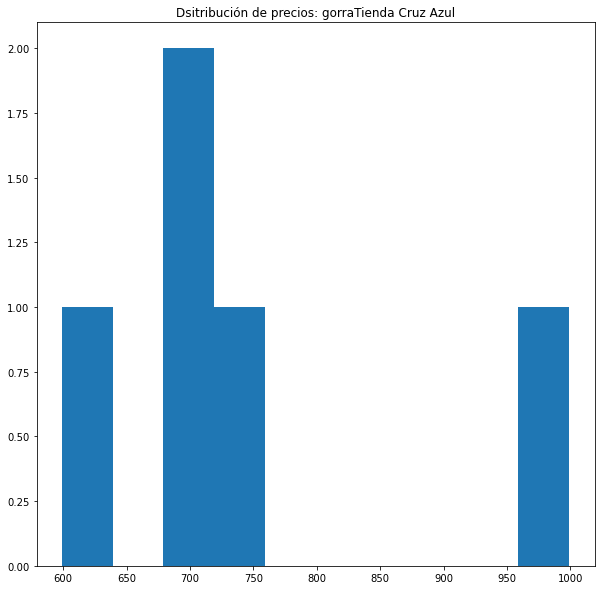

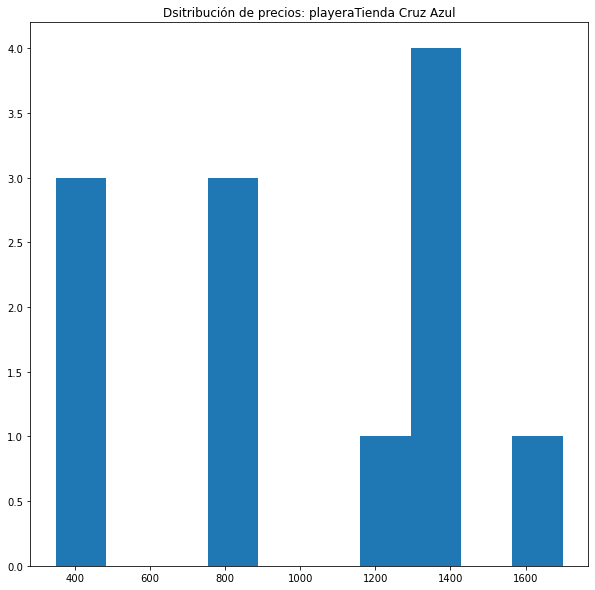

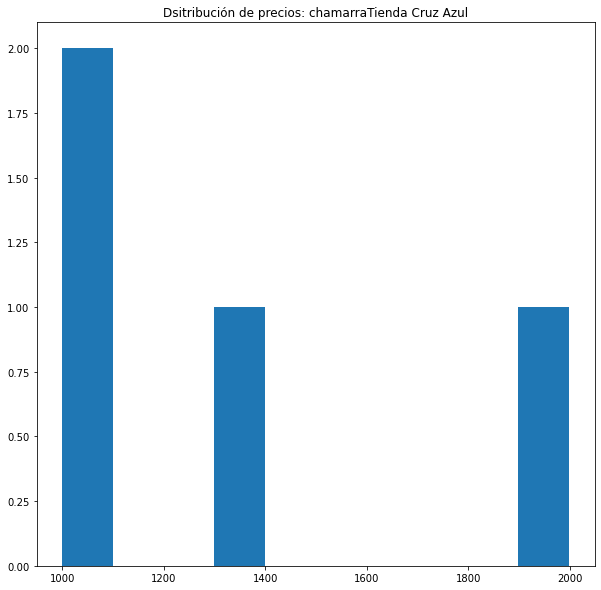

In [92]:
# Ditribución de precios

for i in ["gorra","playera","chamarra"]:
    plt.figure(figsize=(10,10))
    plt.hist(df_cruz_azul[df_cruz_azul['marca']==i]["precio2"])
    plt.title("Dsitribución de precios: " +str(i)+"Tienda Cruz Azul")
    plt.show()